# 12-1. 프로젝트: 자율주행 보조 시스템 만들기
먼저 주요 라이브러리 버전을 확인해봅시다.

In [2]:
import tensorflow as tf

print(tf.__version__)

2.6.0


In [3]:
tf.config.list_physical_devices('GPU')

[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]

In [4]:
print("Num GPUs Available: ", len(tf.config.experimental.list_physical_devices('GPU')))
gpus = tf.config.experimental.list_physical_devices('GPU')
if gpus:
    try:
    # 메모리 사용 제한을 위한 설정
        for gpu in gpus:
            tf.config.experimental.set_memory_growth(gpu, True)
    # 특정 GPU만 사용하도록 설정
        tf.config.experimental.set_visible_devices(gpus[0], 'GPU')
    except RuntimeError as e:
        # 프로그램 시작 후에는 GPU 설정을 변경할 수 없으므로
        # 런타임 오류 발생 시 예외 처리가 필요함
        print(e)

Num GPUs Available:  1


1. 자율주행 시스템 만들기
위에서 만든 모델을 통해 아래의 조건을 만족하는 함수를 만들어 주세요.

입력으로 이미지 경로를 받습니다.
정지조건에 맞는 경우 "Stop" 아닌 경우 "Go"를 반환합니다.
조건은 다음과 같습니다.
사람이 한 명 이상 있는 경우
차량의 크기(width or height)가 300px이상인 경우

## 필요한 라이브러리 불러오기

In [42]:
import os, copy
import numpy as np
import tensorflow as tf
import tensorflow_datasets as tfds
import cv2

import matplotlib.pyplot as plt
from PIL import Image, ImageDraw

DATA_PATH = os.getenv('HOME') + '/aiffel/object_detection/data'

print('슝=3')

슝=3


- 데이터 로드하기

In [6]:
(ds_train, ds_test), ds_info = tfds.load(
    'kitti',
    data_dir=DATA_PATH,
    split=['train', 'test'],
    shuffle_files=True,
    with_info=True,
)
print('슝=3')

슝=3


- 데이터 확인하기

In [24]:
print(tf.data.experimental.cardinality(ds_train)) 
print(tf.data.experimental.cardinality(ds_test))

tf.Tensor(6347, shape=(), dtype=int64)
tf.Tensor(711, shape=(), dtype=int64)


In [25]:
num_classes = ds_info.features['objects']['type'].num_classes
classes_name = ds_info.features['objects']['type'].names

print(f"클래스 갯수 : {num_classes}")
print(f"클래스 이름 : {classes_name}")

클래스 갯수 : 8
클래스 이름 : ['Car', 'Van', 'Truck', 'Pedestrian', 'Person_sitting', 'Cyclist', 'Tram', 'Misc']


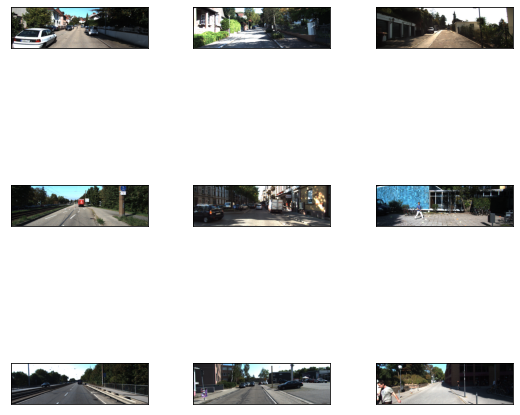

In [7]:
_ = tfds.show_examples(ds_train, ds_info)

In [8]:
ds_info

tfds.core.DatasetInfo(
    name='kitti',
    full_name='kitti/3.2.0',
    description="""
    Kitti contains a suite of vision tasks built using an autonomous driving
    platform. The full benchmark contains many tasks such as stereo, optical flow,
    visual odometry, etc. This dataset contains the object detection dataset,
    including the monocular images and bounding boxes. The dataset contains 7481
    training images annotated with 3D bounding boxes. A full description of the
    annotations can be found in the readme of the object development kit readme on
    the Kitti homepage.
    """,
    homepage='http://www.cvlibs.net/datasets/kitti/',
    data_path='/aiffel/aiffel/object_detection/data/kitti/3.2.0',
    download_size=11.71 GiB,
    dataset_size=5.27 GiB,
    features=FeaturesDict({
        'image': Image(shape=(None, None, 3), dtype=tf.uint8),
        'image/file_name': Text(shape=(), dtype=tf.string),
        'objects': Sequence({
            'alpha': tf.float32,
     

- 학습용 데이터 셋 확인하기

------Example------
['image', 'image/file_name', 'objects']
------objects------
{'alpha': <tf.Tensor: shape=(5,), dtype=float32, numpy=array([-1.18, -1.54, -1.45,  1.8 , -1.57], dtype=float32)>, 'bbox': <tf.Tensor: shape=(5, 4), dtype=float32, numpy=
array([[0.01791444, 0.09990307, 0.4918984 , 0.3371567 ],
       [0.36486632, 0.41281906, 0.5442781 , 0.4722698 ],
       [0.42294118, 0.40404686, 0.5500267 , 0.45049274],
       [0.46037433, 0.35322294, 0.59291446, 0.40316638],
       [0.45286095, 0.4761551 , 0.54994655, 0.50539577]], dtype=float32)>, 'dimensions': <tf.Tensor: shape=(5, 3), dtype=float32, numpy=
array([[1.41, 1.54, 3.36],
       [1.52, 1.67, 4.38],
       [1.56, 1.59, 3.65],
       [2.35, 1.88, 5.74],
       [1.48, 1.47, 2.23]], dtype=float32)>, 'location': <tf.Tensor: shape=(5, 3), dtype=float32, numpy=
array([[-3.22,  1.53,  7.64],
       [-1.34,  1.27, 18.71],
       [-2.53,  1.13, 25.69],
       [-6.78,  0.95, 37.24],
       [ 0.25,  0.94, 30.63]], dtype=float32)>, 'oc

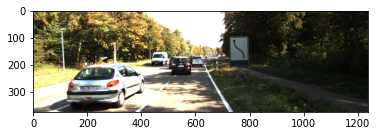

In [9]:
sample = ds_train.take(1)

for example in sample:
    print('------Example------')
    print(list(example.keys()))
    image = example["image"]
    filename = example["image/file_name"].numpy().decode('utf-8')
    objects = example["objects"]

print('------objects------')
print(objects)

img = Image.fromarray(image.numpy())
plt.imshow(img)
plt.show()

- 바운딩 박스 그려서 시각화 하기

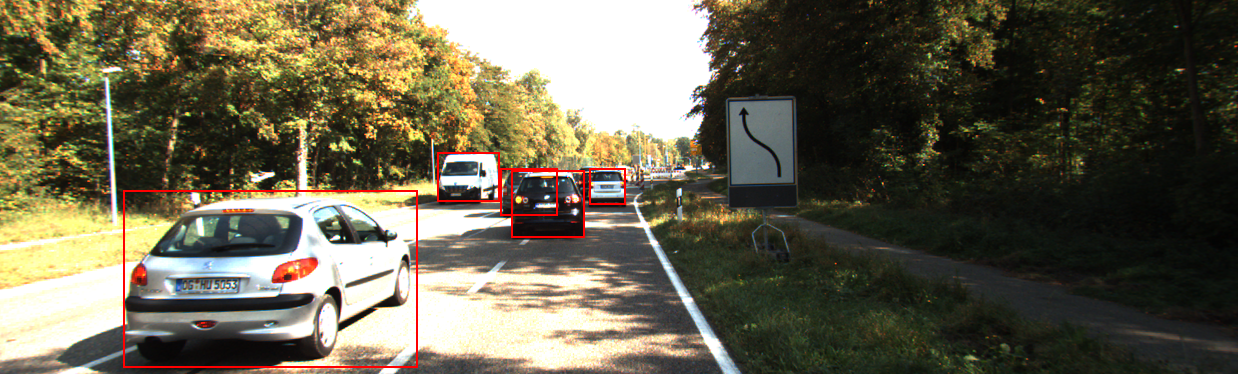

In [10]:
# 이미지 위에 바운딩 박스를 그려 화면에 표시해 주세요.
def visualize_bbox(input_image, object_bbox):
    input_image = copy.deepcopy(input_image)
    draw = ImageDraw.Draw(input_image)

 
    # 바운딩 박스 좌표(x_min, x_max, y_min, y_max) 구하기
    # [[YOUR CODE]]
    
    width, height = img.size
    x_min = object_bbox[:,1] * width
    x_max = object_bbox[:,3] * width
    y_min = height - object_bbox[:,0] * height
    y_max = height - object_bbox[:,2] * height
    
    
    # 바운딩 박스 그리기
    # [[YOUR CODE]]
    
    rects = np.stack([x_min, y_min, x_max, y_max], axis=1)
    for _rect in rects:
        draw.rectangle(_rect, outline=(255,0,0), width=2)
        
    return input_image

visualize_bbox(img, objects['bbox'].numpy())

# 데이터 준비

## 데이터 파이프 라인
---
먼저 주어진 KITTI 데이터를 학습에 맞는 형태로 바꾸어 주어야 합니다. 이때 사용할 데이터 파이프라인을 구축합니다.

데이터 파이프라인은 총 4단계로 이루어집니다.

1. x와 y좌표 위치 교체
2. 무작위로 수평 뒤집기(Flip)
3. 이미지 크기 조정 및 패딩 추가
4. 좌표계를 [x_min, y_min, x_max, y_max]에서 [x_min, y_min, width, height]으로 수정

독립적인 함수를 각각 작성합니다.

In [11]:
# 1. x와 y좌표 위치 교체
def swap_xy(boxes):
    return tf.stack([boxes[:, 1], boxes[:, 0], boxes[:, 3], boxes[:, 2]], axis=-1)

print('슝=3')

슝=3


In [12]:
# 무작위로 수평 뒤집기(Flip)
def random_flip_horizontal(image, boxes):
    if tf.random.uniform(()) > 0.5:
        image = tf.image.flip_left_right(image)
        boxes = tf.stack(
           [1 - boxes[:, 2], boxes[:, 1], 1 - boxes[:, 0], boxes[:, 3]], axis=-1
        )
        
    return image, boxes

print('슝=3')

슝=3


- 학습이 완료된 모델을 사용할 때는 입력할 이미지를 다양한 크기로 바꿀 필요는 없으니 분기처리를 해줍니다.

In [13]:
# 3. 이미지 크기 조정 및 패딩 추가
def resize_and_pad_image(image, training=True):
    # 최소 사이드와 최대 사이드 크기를 설정합니다.
    min_side = 800.0
    max_side = 1333.0
    # 학습 시 사용할 최소 사이드 범위를 설정합니다.
    min_side_range = [640, 1024]
    # 모델에 입력되는 이미지 크기는 stride의 배수가 되어야 합니다.
    stride = 128.0
    
    # 현재 이미지의 크기를 얻습니다.
    image_shape = tf.cast(tf.shape(image)[:2], dtype=tf.float32)
    # 학습 시에는 설정된 범위 내에서 무작위로 최소 사이드 길이를 선택합니다.
    if training:
        min_side = tf.random.uniform((), min_side_range[0], min_side_range[1], dtype=tf.float32)
    # 이미지의 최소 길이를 최소 사이드 길이에 맞추어 비율을 계산합니다.
    ratio = min_side / tf.reduce_min(image_shape)
    # 만약 조정된 최대 길이가 설정된 최대 사이드보다 크면 최대 길이를 최대 사이드에 맞추어 비율을 다시 계산합니다.
    if ratio * tf.reduce_max(image_shape) > max_side:
        ratio = max_side / tf.reduce_max(image_shape)
    # 계산된 비율로 이미지의 새로운 크기를 결정합니다.
    image_shape = ratio * image_shape
    # 새로운 크기로 이미지를 리사이즈합니다.
    image = tf.image.resize(image, tf.cast(image_shape, dtype=tf.int32))
    # 패딩이 추가될 이미지의 새로운 크기를 stride의 배수로 계산합니다.
    padded_image_shape = tf.cast(
        tf.math.ceil(image_shape / stride) * stride, dtype=tf.int32
    )
    # 이미지에 패딩을 추가하여 모델에 입력될 때 필요한 크기를 맞춥니다.
    image = tf.image.pad_to_bounding_box(
        image, 0, 0, padded_image_shape[0], padded_image_shape[1]
    )
    # 최종적으로 리사이즈 및 패딩된 이미지, 이미지의 새로운 크기, 그리고 사용된 비율을 반환합니다.
    return image, image_shape, ratio

print('슝=3')


슝=3


In [14]:
# 4. 좌표계를 [x_min, y_min, x_max, y_max]에서 [x_min, y_min, width, height]으로 수정
def convert_to_xywh(boxes):
    # boxes[..., :2]는 각 박스의 좌상단 (x_min, y_min) 좌표를,
    # boxes[..., 2:]는 각 박스의 우하단 (x_max, y_max) 좌표를 나타냅니다.
    
    # 박스의 중심점을 계산합니다. (x_center, y_center)는 (x_min + x_max) / 2, (y_min + y_max) / 2로 구할 수 있습니다.
    center = (boxes[..., :2] + boxes[..., 2:]) / 2.0
    
    # 박스의 너비와 높이를 계산합니다. 너비(width)는 x_max - x_min, 높이(height)는 y_max - y_min로 구할 수 있습니다.
    size = boxes[..., 2:] - boxes[..., :2]
    
    # 중심점과 크기를 연결(concatenate)하여 새로운 박스 형식을 만듭니다.
    # 이 결과는 (x_center, y_center, width, height) 형태의 좌표가 됩니다.
    new_boxes = tf.concat([center, size], axis=-1)
    
    # 변환된 박스 형식을 반환합니다.
    return new_boxes

print('슝=3')


슝=3


이제 준비된 함수들을 연결해 줍니다.

In [15]:
def preprocess_data(sample):
    # 샘플에서 이미지를 추출합니다.
    image = sample["image"]
    # 바운딩 박스의 좌표를 x_min, y_min, x_max, y_max에서 x, y, w, h 형태로 변환합니다.
    bbox = swap_xy(sample["objects"]["bbox"])
    # 객체의 클래스 ID를 추출하고 정수형으로 변환합니다.
    class_id = tf.cast(sample["objects"]["type"], dtype=tf.int32)

    # 이미지와 바운딩 박스에 대해 수평으로 무작위로 뒤집기를 수행합니다.
    image, bbox = random_flip_horizontal(image, bbox)
    # 이미지의 크기를 조정하고 필요한 경우 패딩을 추가합니다. 이미지의 새로운 크기도 함께 반환합니다.
    image, image_shape, _ = resize_and_pad_image(image)

    # 바운딩 박스의 좌표를 이미지의 새로운 크기에 맞추어 조정합니다.
    bbox = tf.stack(
        [
            bbox[:, 0] * image_shape[1], # x_min 조정
            bbox[:, 1] * image_shape[0], # y_min 조정
            bbox[:, 2] * image_shape[1], # x_max 조정
            bbox[:, 3] * image_shape[0], # y_max 조정
        ],
        axis=-1,
    )
    # 조정된 바운딩 박스의 좌표를 중심 좌표와 너비/높이 형태로 변환합니다.
    bbox = convert_to_xywh(bbox)
    # 전처리된 이미지, 바운딩 박스, 클래스 ID를 반환합니다.
    return image, bbox, class_id

print('슝=3')


슝=3


## 인코딩

- Anchor Box라는 정해져 있는 위치, 크기, 비율 중에 하나로 물체의 위치가 결정된다.
- 기본적으로 Anchor Box는 생성해줘야 한다.
    - Anchor Box = 물체 위치 후보
    - Anchor Box로부터 상하좌우로 떨어진 정도, 가로 세로의 크기 차이를 미세하게 찾아낸다.
    - Anchor Box가 촘촘하게 겹치도록 생성되기 때문에 물체를 잘 찾아낼 수 있다.


- 앵커 박스 함수

In [16]:
# 앵커 박스 생성
class AnchorBox:
    def __init__(self):
        # 앵커의 종횡비를 정의합니다.
        self.aspect_ratios = [0.5, 1.0, 2.0]
        # 앵커의 스케일을 정의합니다.
        self.scales = [2 ** x for x in [0, 1 / 3, 2 / 3]]

        # 각 feature map에 대해 생성될 앵커의 수를 계산합니다.
        self._num_anchors = len(self.aspect_ratios) * len(self.scales)
        # feature map을 통과하는 동안 사용될 stride 값들을 정의합니다.
        self._strides = [2 ** i for i in range(3, 8)]
        # 각 feature map의 영역(면적)을 정의합니다.
        self._areas = [x ** 2 for x in [32.0, 64.0, 128.0, 256.0, 512.0]]
        # 앵커의 차원을 계산합니다.
        self._anchor_dims = self._compute_dims()

    def _compute_dims(self):
        # 각 면적과 비율에 대해 앵커의 차원(너비와 높이)을 계산합니다.
        anchor_dims_all = []
        for area in self._areas:
            anchor_dims = []
            for ratio in self.aspect_ratios:
                # 면적과 비율을 바탕으로 높이와 너비를 계산합니다.
                anchor_height = tf.math.sqrt(area / ratio)
                anchor_width = area / anchor_height
                # 계산된 높이와 너비를 바탕으로 차원을 정의합니다.
                dims = tf.reshape(
                    tf.stack([anchor_width, anchor_height], axis=-1), [1, 1, 2]
                )
                for scale in self.scales:
                    # 스케일을 적용하여 앵커 차원을 조정합니다.
                    anchor_dims.append(scale * dims)
            anchor_dims_all.append(tf.stack(anchor_dims, axis=-2))
        return anchor_dims_all

    def _get_anchors(self, feature_height, feature_width, level):
        # feature map의 각 위치에 대한 중심점을 계산합니다.
        rx = tf.range(feature_width, dtype=tf.float32) + 0.5
        ry = tf.range(feature_height, dtype=tf.float32) + 0.5
        # 중심점을 stride에 따라 조정합니다.
        centers = tf.stack(tf.meshgrid(rx, ry), axis=-1) * self._strides[level - 3]
        # 각 중심점에 앵커 차원을 추가합니다.
        centers = tf.expand_dims(centers, axis=-2)
        centers = tf.tile(centers, [1, 1, self._num_anchors, 1])
        dims = tf.tile(
            self._anchor_dims[level - 3], [feature_height, feature_width, 1, 1]
        )
        # 중심점과 차원을 결합하여 앵커를 완성합니다.
        anchors = tf.concat([centers, dims], axis=-1)
        # 앵커를 1D 텐서로 변환하여 반환합니다.
        return tf.reshape(
            anchors, [feature_height * feature_width * self._num_anchors, 4]
        )

    def get_anchors(self, image_height, image_width):
        # 이미지의 각 레벨에 대해 앵커를 계산하고 모두 합쳐서 반환합니다.
        anchors = [
            self._get_anchors(
                tf.math.ceil(image_height / 2 ** i),
                tf.math.ceil(image_width / 2 ** i),
                i,
            )
            for i in range(3, 8)
        ]
        return tf.concat(anchors, axis=0)

print('슝=3')


슝=3


이제 Anchor Box를 생성했으니 입력할 데이터를 Anchor Box에 맞게 변형해줘야 합니다.

데이터 원본의 bbox는 주관식 정답이라고 생각하면 됩니다. 하지만 모델은 객관식으로 문제를 풀어야 하기 때문에 주관식 정답을 가장 가까운 객관식 정답으로 바꿔줘야 모델을 학습시킬 수 있습니다.

그럼 어떻게 주관식 정답을 객관식 정답으로 바꿀 수 있을까요? 여기에서 IoU를 사용합니다.

IoU가 높은지 낮은지에 따라 Anchor Box가 정답인지 오답인지 체크해 두는 것이죠. 그러니 IoU를 계산할 수 있는 함수를 만듭니다.

In [17]:
# 바운딩 박스의 중심 좌표와 크기를 바탕으로 코너 좌표를 계산하는 함수입니다.
def convert_to_corners(boxes):
    # boxes[..., :2]는 중심 좌표 x, y를 나타내고,
    # boxes[..., 2:]는 바운딩 박스의 너비와 높이를 나타냅니다.
    # 이 정보를 이용해 왼쪽 상단과 오른쪽 하단 코너 좌표로 변환합니다.
    return tf.concat(
        [boxes[..., :2] - boxes[..., 2:] / 2.0,  # 왼쪽 상단 코너 좌표 계산
         boxes[..., :2] + boxes[..., 2:] / 2.0],  # 오른쪽 하단 코너 좌표 계산
        axis=-1,
    )

# 두 세트의 바운딩 박스 사이의 IoU를 계산하는 함수입니다.
def compute_iou(boxes1, boxes2):
    # 먼저 코너 좌표로 변환합니다.
    boxes1_corners = convert_to_corners(boxes1)
    boxes2_corners = convert_to_corners(boxes2)
    
    # 교차 영역의 왼쪽 상단(lu)과 오른쪽 하단(rd) 좌표를 계산합니다.
    lu = tf.maximum(boxes1_corners[:, None, :2], boxes2_corners[:, :2])
    rd = tf.minimum(boxes1_corners[:, None, 2:], boxes2_corners[:, 2:])
    
    # 교차 영역의 크기를 계산합니다.
    intersection = tf.maximum(0.0, rd - lu)
    
    # 교차 영역의 면적을 구합니다.
    intersection_area = intersection[:, :, 0] * intersection[:, :, 1]
    
    # 각 바운딩 박스의 면적을 구합니다.
    boxes1_area = boxes1[:, 2] * boxes1[:, 3]
    boxes2_area = boxes2[:, 2] * boxes2[:, 3]
    
    # 합집합 영역의 면적을 계산합니다.
    union_area = tf.maximum(
        boxes1_area[:, None] + boxes2_area - intersection_area, 1e-8
    )
    
    # IoU를 계산하고, 결과값의 범위가 [0, 1]이 되도록 조정합니다.
    return tf.clip_by_value(intersection_area / union_area, 0.0, 1.0)

print('슝=3')


슝=3


이제 실제 라벨을 Anchor Box에 맞춰주는 클래스를 만들어 봅시다. 위에서 작성한 compute_iou 함수를 이용해서 IoU를 구하고 그 IoU를 기준으로 물체에 해당하는 Anchor Box와 배경이 되는 Anchor Box를 지정해 줍니다. 그리고 그 Anchor Box와 실제 Bounding Box의 미세한 차이를 계산합니다. 상하좌우의 차이, 가로세로 크기의 차이를 기록해 두는데 가로세로 크기는 로그를 사용해서 기록해 둡니다.

    이 과정에서 variance가 등장하는데 관례적으로 Anchor Box를 사용할 때 등장합니다.
    어디에도 정확한 이유가 등장하지는 않지만 상하좌우의 차이에는 0.1, 가로세로 크기의 차이에는 0.2를 사용합니다.
    이와 관련하여 통계적 추정치를 계산할 때 분산으로 나눠주는 것 때문이라는 의견이 있습니다.

이 과정은 마치 데이터를 훈련이 가능한 형식으로 encode하는 것 같으니 LabelEncoder라는 이름으로 클래스를 만들었습니다.

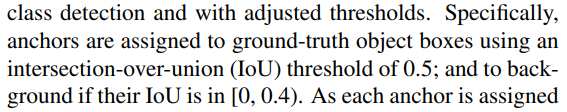
[IoU가 0.5보다 높으면 물체, 0.4보다 낮으면 배경입니다](https://arxiv.org/pdf/1708.02002.pdf)

In [18]:
class LabelEncoder:
    def __init__(self):
        # 앵커 박스 생성 객체 초기화
        self._anchor_box = AnchorBox()
        # 바운딩 박스 변형에 사용되는 분산 값 초기화
        self._box_variance = tf.convert_to_tensor(
            [0.1, 0.1, 0.2, 0.2], dtype=tf.float32
        )

    # 앵커 박스와 실제 바운딩 박스를 매칭하는 함수
    def _match_anchor_boxes(
        self, anchor_boxes, gt_boxes, match_iou=0.5, ignore_iou=0.4
    ):
        # 앵커 박스와 실제 바운딩 박스 사이의 IoU 계산
        iou_matrix = compute_iou(anchor_boxes, gt_boxes)
        # 각 앵커 박스에 대해 가장 높은 IoU 값을 가진 실제 박스의 인덱스 찾기
        max_iou = tf.reduce_max(iou_matrix, axis=1)
        matched_gt_idx = tf.argmax(iou_matrix, axis=1)
        # 양성 및 음성 샘플 마스크 생성
        positive_mask = tf.greater_equal(max_iou, match_iou)
        negative_mask = tf.less(max_iou, ignore_iou)
        # 무시할 샘플 마스크 생성
        ignore_mask = tf.logical_not(tf.logical_or(positive_mask, negative_mask))
        return (
            matched_gt_idx,
            tf.cast(positive_mask, dtype=tf.float32),
            tf.cast(ignore_mask, dtype=tf.float32),
        )

    # 앵커 박스와 매칭된 실제 바운딩 박스 간의 타겟을 계산하는 함수
    def _compute_box_target(self, anchor_boxes, matched_gt_boxes):
        box_target = tf.concat(
            [
                # 실제 박스와 앵커 박스 사이의 중심점 차이 계산
                (matched_gt_boxes[:, :2] - anchor_boxes[:, :2]) / anchor_boxes[:, 2:],
                # 실제 박스와 앵커 박스 사이의 크기 비율 계산
                tf.math.log(matched_gt_boxes[:, 2:] / anchor_boxes[:, 2:]),
            ],
            axis=-1,
        )
        # 계산된 타겟 값에 분산 값을 적용하여 정규화
        box_target = box_target / self._box_variance
        return box_target

    # 단일 샘플을 인코딩하는 함수
    def _encode_sample(self, image_shape, gt_boxes, cls_ids):
        # 주어진 이미지 크기에 대한 앵커 박스 생성
        anchor_boxes = self._anchor_box.get_anchors(image_shape[1], image_shape[2])
        # 클래스 ID를 실수형으로 변환
        cls_ids = tf.cast(cls_ids, dtype=tf.float32)
        # 앵커 박스와 실제 바운딩 박스 매칭
        matched_gt_idx, positive_mask, ignore_mask = self._match_anchor_boxes(
            anchor_boxes, gt_boxes
        )
        # 매칭된 실제 박스 선택
        matched_gt_boxes = tf.gather(gt_boxes, matched_gt_idx)
        # 타겟 바운딩 박스 계산
        box_target = self._compute_box_target(anchor_boxes, matched_gt_boxes)
        # 매칭된 클래스 ID 선택
        matched_gt_cls_ids = tf.gather(cls_ids, matched_gt_idx)
        # 양성 샘플에 대한 클래스 타겟 설정, 나머지는 -1 또는 -2로 설정
        cls_target = tf.where(
            tf.not_equal(positive_mask, 1.0), -1.0, matched_gt_cls_ids
        )
        cls_target = tf.where(tf.equal(ignore_mask, 1.0), -2.0, cls_target)
        # 클래스 타겟에 차원 추가
        cls_target = tf.expand_dims(cls_target, axis=-1)
        # 최종 레이블 생성
        label = tf.concat([box_target, cls_target], axis=-1)
        return label

    # 배치 데이터를 인코딩하는 함수
    def encode_batch(self, batch_images, gt_boxes, cls_ids):
        # 배치 이미지의 크기 확인
        images_shape = tf.shape(batch_images)
        # 배치 크기 확인
        batch_size = images_shape[0]

        # 배치에 대한 레이블을 저장할 TensorArray 생성
        labels = tf.TensorArray(dtype=tf.float32, size=batch_size, dynamic_size=True)
        for i in range(batch_size):
            # 각 샘플에 대해 인코딩 수행
            label = self._encode_sample(images_shape, gt_boxes[i], cls_ids[i])
            labels = labels.write(i, label)
        # 이미지 전처리
        batch_images = tf.keras.applications.resnet.preprocess_input(batch_images)
        # 전처리된 이미지와 인코딩된 레이블을 반환
        return batch_images, labels.stack()
    
print('슝=3')


슝=3


## 모델 작성 - Feature Pyramid

In [19]:
# FPN을 약간 수정합니다.
class FeaturePyramid(tf.keras.layers.Layer):
    # 클래스 초기화 함수
    def __init__(self, backbone):
        super(FeaturePyramid, self).__init__(name="FeaturePyramid")
        # 백본 모델 설정
        self.backbone = backbone
        # 1x1 컨볼루션 레이어를 통해 채널 수를 조정합니다.
        self.conv_c3_1x1 = tf.keras.layers.Conv2D(256, 1, 1, "same")
        self.conv_c4_1x1 = tf.keras.layers.Conv2D(256, 1, 1, "same")
        self.conv_c5_1x1 = tf.keras.layers.Conv2D(256, 1, 1, "same")
        # 3x3 컨볼루션 레이어를 사용하여 특성 맵을 정제합니다.
        self.conv_c3_3x3 = tf.keras.layers.Conv2D(256, 3, 1, "same")
        self.conv_c4_3x3 = tf.keras.layers.Conv2D(256, 3, 1, "same")
        self.conv_c5_3x3 = tf.keras.layers.Conv2D(256, 3, 1, "same")
        # 추가적인 특성 피라미드 레이어를 위한 컨볼루션 레이어
        self.conv_c6_3x3 = tf.keras.layers.Conv2D(256, 3, 2, "same")
        self.conv_c7_3x3 = tf.keras.layers.Conv2D(256, 3, 2, "same")
        # 업샘플링 레이어를 통해 특성 맵의 크기를 2배로 증가시킵니다.
        self.upsample_2x = tf.keras.layers.UpSampling2D(2)

    # 네트워크의 포워드 패스를 정의합니다.
    def call(self, images, training=False):
        # 백본 네트워크를 통해 여러 레이어의 특성 맵을 추출합니다.
        c3_output, c4_output, c5_output = self.backbone(images, training=training)
        # 1x1 컨볼루션을 사용하여 채널 수를 조정합니다.
        p3_output = self.conv_c3_1x1(c3_output)
        p4_output = self.conv_c4_1x1(c4_output)
        p5_output = self.conv_c5_1x1(c5_output)
        # 업샘플링과 요소별 덧셈을 통해 더 높은 해상도의 특성 맵과 통합합니다.
        p4_output = p4_output + self.upsample_2x(p5_output)
        p3_output = p3_output + self.upsample_2x(p4_output)
        # 3x3 컨볼루션을 사용하여 특성 맵을 정제합니다.
        p3_output = self.conv_c3_3x3(p3_output)
        p4_output = self.conv_c4_3x3(p4_output)
        p5_output = self.conv_c5_3x3(p5_output)
        # 추가적인 특성 피라미드 레이어를 생성합니다.
        p6_output = self.conv_c6_3x3(c5_output)
        p7_output = self.conv_c7_3x3(tf.nn.relu(p6_output))
        # 여러 크기의 특성 맵을 반환합니다.
        return p3_output, p4_output, p5_output, p6_output, p7_output

print('슝=3')


슝=3


Object Detection의 라벨은 class와 box로 이루어지므로 각각을 추론하는 부분이 필요합니다. 그것을 head라고 부르기도 합니다. Backbone에 해당하는 네트워크와 FPN을 통해 pyramid layer가 추출되고 나면 그 feature들을 바탕으로 class를 예상하고, box도 예상합니다. class와 box가 모두 맞을 수도, class와 box 중 하나만 맞을 수도, 둘 다 틀릴 수도 있겠죠? class를 예측하는 head와 box를 예측하는 head가 별도로 존재한다는 것이 중요합니다.

그래서 각각의 head를 만들어 줍니다. head부분은 유사한 형태로 만들 수 있으니 build_head라는 함수를 하나만 만들고 두 번 호출하면 될 것 같네요.

In [20]:
def build_head(output_filters, bias_init):
    # 시퀀셜 모델을 초기화합니다.
    head = tf.keras.Sequential([tf.keras.Input(shape=[None, None, 256])])

    # 컨볼루션 레이어를 위한 커널 초기화를 설정합니다.
    kernel_init = tf.initializers.RandomNormal(0.0, 0.01)

    # 4개의 컨볼루션 레이어와 ReLU 활성화 함수를 추가합니다.
    for _ in range(4):
        head.add(
            tf.keras.layers.Conv2D(256, 3, padding="same", kernel_initializer=kernel_init)
        )
        head.add(tf.keras.layers.ReLU())

    # 최종 출력을 위한 컨볼루션 레이어를 추가합니다.
    # 이 레이어는 클래스 확률 또는 바운딩 박스 좌표를 예측합니다.
    head.add(
        tf.keras.layers.Conv2D(
            output_filters,
            3,
            1,
            padding="same",
            kernel_initializer=kernel_init,
            bias_initializer=bias_init,
        )
    )

    # 구성된 헤드 네트워크를 반환합니다.
    return head

print('슝=3')


슝=3


우리가 만들 RetinaNet의 backbone은 ResNet50입니다. FPN에 이용할 수 있도록 중간 레이어도 output으로 연결해 줍니다.

In [21]:
def get_backbone():
    # ResNet50 모델을 백본으로 사용합니다.
    # 'include_top=False'는 모델의 최상위 분류 레이어를 포함하지 않는다는 의미입니다.
    # 'input_shape=[None, None, 3]'은 모델이 받아들일 수 있는 이미지의 형태를 정의합니다.
    backbone = tf.keras.applications.ResNet50(
        include_top=False, input_shape=[None, None, 3]
    )

    # ResNet50 모델의 특정 중간 레이어들의 출력을 가져옵니다.
    # 이 레이어들은 특징 피라미드 네트워크(FPN)에서 사용될 특징 맵을 제공합니다.
    c3_output, c4_output, c5_output = [
        backbone.get_layer(layer_name).output
        for layer_name in ["conv3_block4_out", "conv4_block6_out", "conv5_block3_out"]
    ]

    # 정의된 백본 모델을 반환합니다.
    # 이 모델은 입력 이미지를 받아서 세 개의 중간 레이어의 출력을 반환합니다.
    return tf.keras.Model(
        inputs=[backbone.inputs], outputs=[c3_output, c4_output, c5_output]
    )

print('슝=3')


슝=3


이제 RetinaNet을 완성해 봅시다. Backbone + FPN + classification용 head + box용 head 입니다.

In [22]:
class RetinaNet(tf.keras.Model):
    # RetinaNet 모델의 생성자입니다.
    def __init__(self, num_classes, backbone):
        super(RetinaNet, self).__init__(name="RetinaNet")
        # Feature Pyramid Network(FPN)을 초기화합니다.
        # FPN은 백본 네트워크로부터 추출된 특징 맵을 사용하여 더 풍부한 특징을 생성합니다.
        self.fpn = FeaturePyramid(backbone)
        # 탐지할 클래스의 수를 설정합니다.
        self.num_classes = num_classes

        # 객체가 없을 확률에 대한 초기 확률을 설정합니다.
        prior_probability = tf.constant_initializer(-np.log((1 - 0.01) / 0.01))
        # 클래스 예측을 위한 헤드를 구성합니다.
        self.cls_head = build_head(9 * num_classes, prior_probability)
        # 바운딩 박스 예측을 위한 헤드를 구성합니다.
        self.box_head = build_head(9 * 4, "zeros")

    # 모델이 입력 이미지에 대해 호출될 때 실행되는 메서드입니다.
    def call(self, image, training=False):
        # FPN을 통과한 이미지의 특징을 추출합니다.
        features = self.fpn(image, training=training)
        # 배치 크기를 가져옵니다.
        N = tf.shape(image)[0]
        cls_outputs = []
        box_outputs = []
        # 각 FPN 레이어의 출력에 대해 반복합니다.
        for feature in features:
            # 박스 헤드를 사용하여 바운딩 박스 좌표를 예측합니다.
            box_outputs.append(tf.reshape(self.box_head(feature), [N, -1, 4]))
            # 클래스 헤드를 사용하여 클래스 확률을 예측합니다.
            cls_outputs.append(
                tf.reshape(self.cls_head(feature), [N, -1, self.num_classes])
            )
        # 클래스 출력과 박스 출력을 연결합니다.
        cls_outputs = tf.concat(cls_outputs, axis=1)
        box_outputs = tf.concat(box_outputs, axis=1)
        # 최종 출력을 반환합니다.
        return tf.concat([box_outputs, cls_outputs], axis=-1)

print('슝=3')


슝=3


- 이제 모델을 준비했고, Loss에 대한 준비를 해봅시다.

In [23]:
class RetinaNetBoxLoss(tf.losses.Loss):
    # 박스 손실을 계산하는 클래스입니다.
    def __init__(self, delta):
        # 클래스 생성자입니다. 손실 계산 시 사용할 하이퍼파라미터 delta를 초기화합니다.
        super(RetinaNetBoxLoss, self).__init__(reduction="none", name="RetinaNetBoxLoss")
        self._delta = delta  # delta 값은 손실 계산에 사용됩니다.

    def call(self, y_true, y_pred):
        # 손실을 계산하는 메서드입니다. y_true는 실제 박스 좌표, y_pred는 예측된 박스 좌표입니다.
        difference = y_true - y_pred  # 예측값과 실제값의 차이를 계산합니다.
        absolute_difference = tf.abs(difference)  # 차이의 절대값을 계산합니다.
        squared_difference = difference ** 2  # 차이의 제곱을 계산합니다.

        # 조건에 따라 다른 손실 계산을 적용합니다. 
        # absolute_difference가 delta보다 작으면 제곱 손실을 사용하고, 그렇지 않으면 절대 손실을 사용합니다.
        loss = tf.where(
            tf.less(absolute_difference, self._delta),
            0.5 * squared_difference,
            absolute_difference - 0.5,
        )
        return tf.reduce_sum(loss, axis=-1)  # 손실의 합을 반환합니다. 각 예측에 대한 손실을 합산합니다.


class RetinaNetClassificationLoss(tf.losses.Loss):
    # 분류 손실을 계산하는 클래스입니다.
    def __init__(self, alpha, gamma):
        # 클래스 생성자입니다. alpha와 gamma는 손실 계산에 사용되는 하이퍼파라미터입니다.
        super(RetinaNetClassificationLoss, self).__init__(
            reduction="none", name="RetinaNetClassificationLoss"
        )
        self._alpha = alpha  # alpha 값은 클래스 불균형을 조절하는데 사용됩니다.
        self._gamma = gamma  # gamma 값은 어려운 예측에 더 많은 가중치를 주는데 사용됩니다.

    def call(self, y_true, y_pred):
        # 실제 레이블(y_true)과 예측 레이블(y_pred)을 기반으로 손실을 계산합니다.
        cross_entropy = tf.nn.sigmoid_cross_entropy_with_logits(
            labels=y_true, logits=y_pred
        )
        probs = tf.nn.sigmoid(y_pred)
        alpha = tf.where(tf.equal(y_true, 1.0), self._alpha, (1.0 - self._alpha))
        pt = tf.where(tf.equal(y_true, 1.0), probs, 1 - probs)
        loss = alpha * tf.pow(1.0 - pt, self._gamma) * cross_entropy  # Focal loss 계산
        return tf.reduce_sum(loss, axis=-1)  # 손실의 합을 반환합니다.

class RetinaNetLoss(tf.losses.Loss):
    # RetinaNet 모델의 전체 손실을 계산하는 클래스입니다.
    def __init__(self, num_classes=8, alpha=0.25, gamma=2.0, delta=1.0):
        # 클래스 생성자입니다. 필요한 하이퍼파라미터를 초기화합니다.
        super(RetinaNetLoss, self).__init__(reduction="auto", name="RetinaNetLoss")
        self._clf_loss = RetinaNetClassificationLoss(alpha, gamma)  # 분류 손실 인스턴스입니다.
        self._box_loss = RetinaNetBoxLoss(delta)  # 박스 손실 인스턴스입니다.
        self._num_classes = num_classes  # 분류해야 할 클래스 수입니다.

    def call(self, y_true, y_pred):
        # 실제 레이블(y_true)과 예측 레이블(y_pred)을 기반으로 손실을 계산합니다.
        y_pred = tf.cast(y_pred, dtype=tf.float32)
        box_labels = y_true[:, :, :4]  # 박스 레이블입니다.
        box_predictions = y_pred[:, :, :4]  # 박스 예측값입니다.
        cls_labels = tf.one_hot(
            tf.cast(y_true[:, :, 4], dtype=tf.int32),
            depth=self._num_classes,
            dtype=tf.float32,
        )
        cls_predictions = y_pred[:, :, 4:]  # 클래스 예측값입니다.
        positive_mask = tf.cast(tf.greater(y_true[:, :, 4], -1.0), dtype=tf.float32)
        ignore_mask = tf.cast(tf.equal(y_true[:, :, 4], -2.0), dtype=tf.float32)
        clf_loss = self._clf_loss(cls_labels, cls_predictions)
        box_loss = self._box_loss(box_labels, box_predictions)
        clf_loss = tf.where(tf.equal(ignore_mask, 1.0), 0.0, clf_loss)  # 무시 마스크에 따라 분류 손실을 조절합니다.
        box_loss = tf.where(tf.equal(positive_mask, 1.0), box_loss, 0.0)  # 양성 마스크에 따라 박스 손실을 조절합니다.
        normalizer = tf.reduce_sum(positive_mask, axis=-1)
        clf_loss = tf.math.divide_no_nan(tf.reduce_sum(clf_loss, axis=-1), normalizer)
        box_loss = tf.math.divide_no_nan(tf.reduce_sum(box_loss, axis=-1), normalizer)
        loss = clf_loss + box_loss  # 최종 손실은 분류 손실과 박스 손실의 합입니다.
        return loss


## 모델 학습

앞에서 만들어 놓은 클래스와 함수를 이용해서 모델을 조립하고 학습시켜 봅시다.

In [28]:
# # 클래스 수를 정의합니다. 이 예제에서는 8개의 클래스로 구성되어 있습니다.
# num_classes = 8
# 배치 크기를 정의합니다. 이 예제에서는 한 번에 2개의 이미지를 처리합니다.
batch_size = 2

# ResNet50을 백본 네트워크로 사용하는 RetinaNet 모델의 백본을 가져옵니다.
resnet50_backbone = get_backbone()
# RetinaNet의 손실 함수를 초기화합니다. 이 때, 클래스 수를 인자로 전달합니다.
loss_fn = RetinaNetLoss(num_classes)
# RetinaNet 모델을 초기화합니다. 이 때, 클래스 수와 백본 네트워크를 인자로 전달합니다.
model = RetinaNet(num_classes, resnet50_backbone)

# 슝=3은 코드의 끝을 나타내는 주석입니다.
print('슝=3')


94781440/94765736 [==============================] - 0s 0us/step
슝=3


In [29]:
# 학습률(learning rate)의 리스트를 정의합니다. 이 값들은 학습 과정에서 사용됩니다.
learning_rates = [2.5e-06, 0.000625, 0.00125, 0.0025, 0.00025, 2.5e-05]

# 학습률이 변경되는 경계값들을 정의합니다. 이 숫자들은 학습 단계의 특정 지점을 나타냅니다.
learning_rate_boundaries = [125, 250, 500, 240000, 360000]

# PiecewiseConstantDecay 학습률 스케줄러를 사용하여 학습률을 단계적으로 조절합니다.
# 이 스케줄러는 학습 과정에서 정의된 경계값에 도달하면 주어진 학습률 값으로 변경합니다.
learning_rate_fn = tf.optimizers.schedules.PiecewiseConstantDecay(
    boundaries=learning_rate_boundaries, values=learning_rates
)

# 최적화기(optimizer)를 설정합니다. 여기서는 SGD(Stochastic Gradient Descent)를 사용합니다.
# momentum은 학습 과정에서 이전 그라디언트의 영향을 얼마나 받을지 결정하는 값입니다.
optimizer = tf.optimizers.SGD(learning_rate=learning_rate_fn, momentum=0.9)

# 모델을 컴파일합니다. 이 과정에서 앞서 정의한 손실 함수와 최적화기를 사용합니다.
model.compile(loss=loss_fn, optimizer=optimizer)


- 이제 데이터 전처리를 위한 파이프라인도 만들어 줍니다.

In [30]:
# LabelEncoder 인스턴스를 생성합니다. 이는 박스와 클래스 레이블을 인코딩하는 데 사용됩니다.
label_encoder = LabelEncoder()

# TensorFlow Datasets를 사용하여 KITTI 데이터셋을 로드합니다.
# 훈련 및 검증 데이터셋을 분리하고, 데이터셋에 대한 정보도 함께 로드합니다.
(train_dataset, val_dataset), dataset_info = tfds.load(
    "kitti", split=["train", "validation"], with_info=True, data_dir=DATA_PATH
)

# TensorFlow의 자동 조정 기능을 설정합니다.
autotune = tf.data.AUTOTUNE

# 훈련 데이터셋을 전처리합니다.
# `preprocess_data` 함수는 이미지와 레이블을 적절한 형식으로 변환합니다.
train_dataset = train_dataset.map(preprocess_data, num_parallel_calls=autotune)

# 데이터셋을 무작위로 섞습니다.
# `8 * batch_size`는 셔플링에 사용될 버퍼의 크기를 정의합니다.
train_dataset = train_dataset.shuffle(8 * batch_size)

# 데이터셋을 지정된 배치 크기로 패딩 배치 처리합니다.
# `padding_values`는 패딩에 사용될 값들을 정의하며, `drop_remainder`는 마지막 배치가 지정된 배치 크기보다 작을 때 버리도록 설정합니다.
train_dataset = train_dataset.padded_batch(
    batch_size=batch_size, padding_values=(0.0, 1e-8, -1), drop_remainder=True
)

# 레이블 인코더를 사용하여 데이터셋의 레이블을 인코딩합니다.
train_dataset = train_dataset.map(
    label_encoder.encode_batch, num_parallel_calls=autotune
)

# 데이터셋을 사전 가져오기(prefetch)하여 훈련 성능을 향상시킵니다.
train_dataset = train_dataset.prefetch(autotune)

# 검증 데이터셋에 대해서도 동일한 전처리, 패딩 배치 처리 및 레이블 인코딩을 수행합니다.
val_dataset = val_dataset.map(preprocess_data, num_parallel_calls=autotune)
val_dataset = val_dataset.padded_batch(
    batch_size=1, padding_values=(0.0, 1e-8, -1), drop_remainder=True
)
val_dataset = val_dataset.map(label_encoder.encode_batch, num_parallel_calls=autotune)
val_dataset = val_dataset.prefetch(autotune)

print('슝=3')


슝=3


- 학습된 모델을 불러옵니다.

In [32]:
model_dir = './data/checkpoints/'
latest_checkpoint = tf.train.latest_checkpoint(model_dir)
model.load_weights(latest_checkpoint)

print('슝=3')

슝=3


In [45]:
model_dir = './data/checkpoints/'
callbacks_list = [
    tf.keras.callbacks.ModelCheckpoint(
        filepath=os.path.join(model_dir, "weights" + "_epoch_{epoch}"),  # 가중치를 저장할 파일 경로를 지정합니다. 여기서 {epoch}는 현재 에포크 번호로 대체됩니다.
        monitor="loss",  # 모델의 손실을 모니터링합니다.
        save_best_only=False,  # 모든 에포크에서 가중치를 저장합니다. 최고 성능의 모델만 저장하려면 True로 설정합니다.
        save_weights_only=True,  # 전체 모델이 아닌 가중치만 저장합니다.
        verbose=1,  # 학습 과정 중 정보를 출력합니다.
    )
]

epochs = 5  # 학습할 총 에포크 수를 지정합니다.

history = model.fit(
    train_dataset,  # 학습 데이터셋을 지정합니다.
    validation_data=val_dataset,  # 검증 데이터셋을 지정합니다.
    epochs=epochs,  # 총 에포크 수를 설정합니다.
    callbacks=callbacks_list  # 콜백 리스트를 설정합니다.
)

Epoch 1/5
3173/3173 [==============================] - 1607s 494ms/step - loss: 0.7225 - val_loss: 1.0914

Epoch 00001: loss improved from inf to 0.72250, saving model to ./data/checkpoints/weights_epoch_1
Epoch 2/5
3173/3173 [==============================] - 1575s 493ms/step - loss: 0.5663 - val_loss: 1.0814

Epoch 00002: loss improved from 0.72250 to 0.56635, saving model to ./data/checkpoints/weights_epoch_2
Epoch 3/5
3173/3173 [==============================] - 1567s 493ms/step - loss: 0.4751 - val_loss: 0.9789

Epoch 00003: loss improved from 0.56635 to 0.47513, saving model to ./data/checkpoints/weights_epoch_3
Epoch 4/5
3173/3173 [==============================] - 1567s 494ms/step - loss: 0.3999 - val_loss: 1.0287

Epoch 00004: loss improved from 0.47513 to 0.39992, saving model to ./data/checkpoints/weights_epoch_4
Epoch 5/5
3173/3173 [==============================] - 1571s 493ms/step - loss: 0.3527 - val_loss: 0.9657

Epoch 00005: loss improved from 0.39992 to 0.35274, savin

## history 저장하기

In [47]:
import pickle

with open('history.pkl', 'wb') as file_pi:
    pickle.dump(history.history, file_pi) # 처음 학습시
#     pickle.dump(history, file_pi) # 추가 학습시

## 결과 확인하기

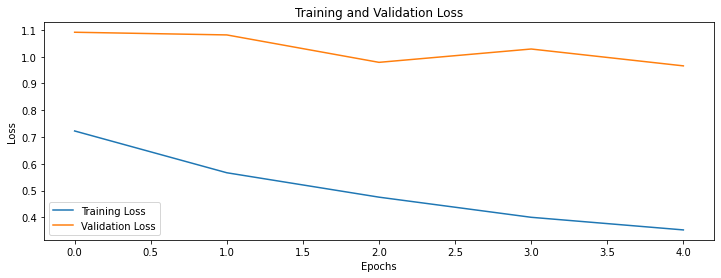

In [48]:
# 첫 학습시
import matplotlib.pyplot as plt

# 학습 과정 시각화
plt.figure(figsize=(12, 4))

# 학습 및 검증 손실 시각화
plt.subplot(1, 1, 1)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

## 첫 번째 추가 학습

In [53]:
# history 불러오기
import pickle

# 저장된 History 객체를 불러옴
with open('history.pkl', 'rb') as file_pi:
    loaded_history = pickle.load(file_pi)

In [54]:
model_dir = './data/checkpoints/'
latest_checkpoint = tf.train.latest_checkpoint(model_dir)
model.load_weights(latest_checkpoint)

print('슝=3')

슝=3


In [55]:
model_dir = './data/checkpoints/'
callbacks_list = [
    tf.keras.callbacks.ModelCheckpoint(
        filepath=os.path.join(model_dir, "weights_2" + "_epoch_{epoch}"),  # 가중치를 저장할 파일 경로를 지정합니다. 여기서 {epoch}는 현재 에포크 번호로 대체됩니다.
        monitor="loss",  # 모델의 손실을 모니터링합니다.
        save_best_only=False,  # 모든 에포크에서 가중치를 저장합니다. 최고 성능의 모델만 저장하려면 True로 설정합니다.
        save_weights_only=True,  # 전체 모델이 아닌 가중치만 저장합니다.
        verbose=1,  # 학습 과정 중 정보를 출력합니다.
    )
]

epochs = 5  # 학습할 총 에포크 수를 지정합니다.

history = model.fit(
    train_dataset,  # 학습 데이터셋을 지정합니다.
    validation_data=val_dataset,  # 검증 데이터셋을 지정합니다.
    epochs=epochs,  # 총 에포크 수를 설정합니다.
    callbacks=callbacks_list  # 콜백 리스트를 설정합니다.
)

Epoch 1/5
3173/3173 [==============================] - 1568s 494ms/step - loss: 0.2977 - val_loss: 1.0079

Epoch 00001: saving model to ./data/checkpoints/weights_2_epoch_1
Epoch 2/5
3173/3173 [==============================] - 1567s 493ms/step - loss: 0.2662 - val_loss: 0.9806

Epoch 00002: saving model to ./data/checkpoints/weights_2_epoch_2
Epoch 3/5
3173/3173 [==============================] - 1568s 494ms/step - loss: 0.2314 - val_loss: 0.9697

Epoch 00003: saving model to ./data/checkpoints/weights_2_epoch_3
Epoch 4/5
3173/3173 [==============================] - 1567s 494ms/step - loss: 0.2036 - val_loss: 1.0003

Epoch 00004: saving model to ./data/checkpoints/weights_2_epoch_4
Epoch 5/5
3173/3173 [==============================] - 1567s 493ms/step - loss: 0.1852 - val_loss: 0.9820

Epoch 00005: saving model to ./data/checkpoints/weights_2_epoch_5


## history 병합하고 저장하기

In [56]:
def merge_histories(history1, history2):
    merged_history = {}
    for key in history1.keys():
        merged_history[key] = history1[key] + history2[key]
    return merged_history


history = merge_histories(loaded_history, history.history)

In [57]:
import pickle

with open('history.pkl', 'wb') as file_pi:
#     pickle.dump(history.history, file_pi) # 처음 학습시
    pickle.dump(history, file_pi) # 추가 학습시

## 결과 확인하기

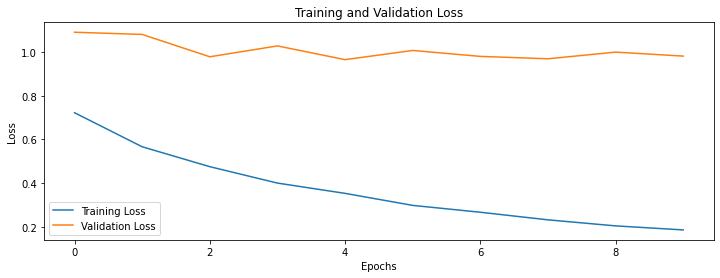

In [58]:
# 첫 번째 추가 학습 후 시각화
import matplotlib.pyplot as plt

# 학습 과정 시각화
plt.figure(figsize=(12, 4))

# 학습 및 검증 손실 시각화
plt.subplot(1, 1, 1)
plt.plot(history['loss'], label='Training Loss')
plt.plot(history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

## 두 번째 추가 학습

In [59]:
# history 불러오기
import pickle

# 저장된 History 객체를 불러옴
with open('history.pkl', 'rb') as file_pi:
    loaded_history = pickle.load(file_pi)

In [60]:
model_dir = './data/checkpoints/'
latest_checkpoint = tf.train.latest_checkpoint(model_dir)
model.load_weights(latest_checkpoint)

print('슝=3')

슝=3


In [61]:
model_dir = './data/checkpoints/'
callbacks_list = [
    tf.keras.callbacks.ModelCheckpoint(
        filepath=os.path.join(model_dir, "weights_3" + "_epoch_{epoch}"),  # 가중치를 저장할 파일 경로를 지정합니다. 여기서 {epoch}는 현재 에포크 번호로 대체됩니다.
        monitor="loss",  # 모델의 손실을 모니터링합니다.
        save_best_only=True,  # 모든 에포크에서 가중치를 저장합니다. 최고 성능의 모델만 저장하려면 True로 설정합니다.
        save_weights_only=True,  # 전체 모델이 아닌 가중치만 저장합니다.
        verbose=1,  # 학습 과정 중 정보를 출력합니다.
    )
]

epochs = 5  # 학습할 총 에포크 수를 지정합니다.

history = model.fit(
    train_dataset,  # 학습 데이터셋을 지정합니다.
    validation_data=val_dataset,  # 검증 데이터셋을 지정합니다.
    epochs=epochs,  # 총 에포크 수를 설정합니다.
    callbacks=callbacks_list  # 콜백 리스트를 설정합니다.
)

Epoch 1/5
3173/3173 [==============================] - 1567s 494ms/step - loss: 0.1632 - val_loss: 1.0034

Epoch 00001: loss improved from inf to 0.16319, saving model to ./data/checkpoints/weights_3_epoch_1
Epoch 2/5
3173/3173 [==============================] - 1569s 493ms/step - loss: 0.1451 - val_loss: 1.0143

Epoch 00002: loss improved from 0.16319 to 0.14514, saving model to ./data/checkpoints/weights_3_epoch_2
Epoch 3/5
3173/3173 [==============================] - 1570s 494ms/step - loss: 0.1302 - val_loss: 0.9980

Epoch 00003: loss improved from 0.14514 to 0.13017, saving model to ./data/checkpoints/weights_3_epoch_3
Epoch 4/5
3173/3173 [==============================] - 1570s 494ms/step - loss: 0.1195 - val_loss: 1.0430

Epoch 00004: loss improved from 0.13017 to 0.11954, saving model to ./data/checkpoints/weights_3_epoch_4
Epoch 5/5
3173/3173 [==============================] - 1571s 495ms/step - loss: 0.1080 - val_loss: 1.0499

Epoch 00005: loss improved from 0.11954 to 0.1080

## history 병합하고 저장하기

In [62]:
def merge_histories(history1, history2):
    merged_history = {}
    for key in history1.keys():
        merged_history[key] = history1[key] + history2[key]
    return merged_history


history = merge_histories(loaded_history, history.history)

In [63]:
import pickle

with open('history.pkl', 'wb') as file_pi:
#     pickle.dump(history.history, file_pi) # 처음 학습시
    pickle.dump(history, file_pi) # 추가 학습시

## 결과 확인하기

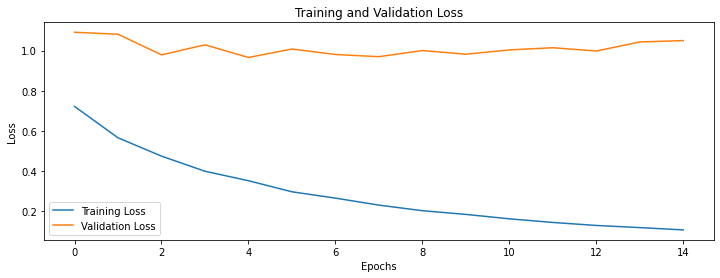

In [64]:
# 두 번째 추가 학습 후 시각화
import matplotlib.pyplot as plt

# 학습 과정 시각화
plt.figure(figsize=(12, 4))

# 학습 및 검증 손실 시각화
plt.subplot(1, 1, 1)
plt.plot(history['loss'], label='Training Loss')
plt.plot(history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

## 예측 함수

In [33]:
class DecodePredictions(tf.keras.layers.Layer):
    # 예측값을 해석하는 레이어 클래스입니다.
    def __init__(
        self,
        num_classes=8,
        confidence_threshold=0.05,
        nms_iou_threshold=0.5,
        max_detections_per_class=100,
        max_detections=100,
        box_variance=[0.1, 0.1, 0.2, 0.2]
    ):
        super(DecodePredictions, self).__init__()
        # 클래스 초기화, 파라미터들을 설정합니다.
        self.num_classes = num_classes  # 분류할 클래스 수입니다.
        self.confidence_threshold = confidence_threshold  # 신뢰도 임계값입니다.
        self.nms_iou_threshold = nms_iou_threshold  # NMS(Non-Maximum Suppression)를 위한 IOU(Intersection over Union) 임계값입니다.
        self.max_detections_per_class = max_detections_per_class  # 클래스당 최대 탐지 개수입니다.
        self.max_detections = max_detections  # 전체 최대 탐지 개수입니다.

        self._anchor_box = AnchorBox()  # 앵커 박스를 생성하는 인스턴스입니다.
        self._box_variance = tf.convert_to_tensor(
            box_variance, dtype=tf.float32
        )  # 박스 변이값을 텐서로 변환합니다.

    def _decode_box_predictions(self, anchor_boxes, box_predictions):
        # 박스 예측값을 디코딩하는 함수입니다.
        boxes = box_predictions * self._box_variance
        boxes = tf.concat(
            [
                boxes[:, :, :2] * anchor_boxes[:, :, 2:] + anchor_boxes[:, :, :2],
                tf.math.exp(boxes[:, :, 2:]) * anchor_boxes[:, :, 2:],
            ],
            axis=-1,
        )
        boxes_transformed = convert_to_corners(boxes)
        return boxes_transformed

    def call(self, images, predictions):
        # 레이어의 호출 함수입니다.
        image_shape = tf.cast(tf.shape(images), dtype=tf.float32)
        anchor_boxes = self._anchor_box.get_anchors(image_shape[1], image_shape[2])
        box_predictions = predictions[:, :, :4]
        cls_predictions = tf.nn.sigmoid(predictions[:, :, 4:])
        boxes = self._decode_box_predictions(anchor_boxes[None, ...], box_predictions)

        # NMS를 적용하여 중복 탐지를 제거하고 최종 탐지 결과를 반환합니다.
        return tf.image.combined_non_max_suppression(
            tf.expand_dims(boxes, axis=2),
            cls_predictions,
            self.max_detections_per_class,
            self.max_detections,
            self.nms_iou_threshold,
            self.confidence_threshold,
            clip_boxes=False,
        )

print('슝=3')


슝=3


이제 추론이 가능한 모델을 조립합니다.

In [65]:
image = tf.keras.Input(shape=[None, None, 3], name="image")
predictions = model(image, training=False)
detections = DecodePredictions(confidence_threshold=0.5)(image, predictions)
inference_model = tf.keras.Model(inputs=image, outputs=detections)

print('슝=3')

슝=3


모델의 추론 결과를 시각화 할 함수를 만들어 줍니다.

In [35]:
def visualize_detections(
    image, boxes, classes, scores, figsize=(7, 7), linewidth=1, color=[0, 0, 1]
):
    # 탐지 결과를 시각화하는 함수입니다.
    image = np.array(image, dtype=np.uint8)  # 이미지를 NumPy 배열로 변환합니다.
    plt.figure(figsize=figsize)  # 그래프의 크기를 설정합니다.
    plt.axis("off")  # 축을 끕니다.
    plt.imshow(image)  # 이미지를 출력합니다.
    ax = plt.gca()  # 현재 축을 가져옵니다.
    for box, _cls, score in zip(boxes, classes, scores):
        # 각 탐지된 객체에 대해서 반복합니다.
        text = "{}: {:.2f}".format(_cls, score)  # 클래스와 점수를 텍스트로 만듭니다.
        x1, y1, x2, y2 = box
        origin_x, origin_y = x1, image.shape[0] - y2  # 박스의 원점 좌표를 계산합니다.
        w, h = x2 - x1, y2 - y1  # 박스의 너비와 높이를 계산합니다.
        patch = plt.Rectangle(
            [origin_x, origin_y], w, h, fill=False, edgecolor=color, linewidth=linewidth
        )  # 박스를 그립니다.
        ax.add_patch(patch)  # 박스를 축에 추가합니다.
        ax.text(
            origin_x,
            origin_y,
            text,
            bbox={"facecolor": color, "alpha": 0.4},  # 텍스트의 배경색과 투명도를 설정합니다.
            clip_box=ax.clipbox,
            clip_on=True,
        )  # 텍스트를 출력합니다.
    plt.show()  # 그래프를 표시합니다.
    return ax

print('슝=3')


슝=3


이제 추론시에 입력 데이터를 전처리하기 위한 함수를 만들게요.

학습을 위한 전처리와 추론을 위한 전처리가 다르기 때문에 따로 작성됩니다. 추론을 위한 전처리가 훨씬 간단하네요.

In [36]:
def prepare_image(image):
    # 이미지를 처리하는 함수입니다.
    image, _, ratio = resize_and_pad_image(image, training=False)  # 이미지를 리사이징하고 패딩을 추가합니다.
    image = tf.keras.applications.resnet.preprocess_input(image)  # ResNet에 적합한 방식으로 이미지를 전처리합니다.
    return tf.expand_dims(image, axis=0), ratio  # 이미지를 모델 입력 형식에 맞게 차원을 확장하고, 비율을 반환합니다.


이제 모든 것이 준비 되었으니 학습된 결과를 확인합시다!!

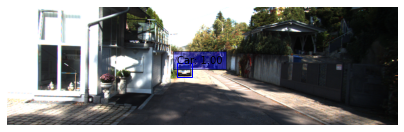

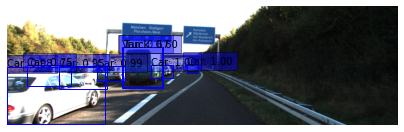

In [66]:
test_dataset = tfds.load("kitti", split="test", data_dir=DATA_PATH)  # KITTI 데이터셋의 테스트 분할을 로드합니다.
int2str = dataset_info.features["objects"]["type"].int2str  # 정수 클래스 ID를 문자열로 변환하는 함수를 정의합니다.

for sample in test_dataset.take(2):
    # 테스트 데이터셋에서 두 개의 샘플에 대해 반복합니다.
    image = tf.cast(sample["image"], dtype=tf.float32)  # 이미지를 float32 타입으로 변환합니다.
    input_image, ratio = prepare_image(image)  # 이미지를 준비합니다.
    detections = inference_model.predict(input_image)  # 모델을 사용하여 탐지를 수행합니다.
    num_detections = detections.valid_detections[0]  # 유효한 탐지 개수를 가져옵니다.
    class_names = [
        int2str(int(x)) for x in detections.nmsed_classes[0][:num_detections]
    ]  # 탐지된 클래스 이름을 추출합니다.
    visualize_detections(
        image,
        detections.nmsed_boxes[0][:num_detections] / ratio,  # 탐지된 박스의 위치를 조정합니다.
        class_names,
        detections.nmsed_scores[0][:num_detections],  # 탐지된 객체의 점수를 가져옵니다.
    )

## GO or STOP!

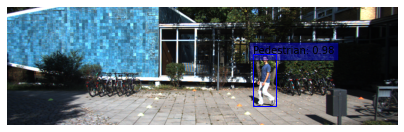

Stop


In [51]:
img_path = './data/stop_1.png'

def self_drive_assist(img_path, size_limit=300):
    # 이미지를 불러오고 색상 형식을 변환합니다 (OpenCV는 BGR을 사용하나, 일반적으로 RGB 형식이 필요합니다).
    image = cv2.imread(img_path)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    image = np.asarray(image)  # 이미지를 NumPy 배열로 변환합니다.
    input_tensor = tf.convert_to_tensor(image, dtype=tf.float32)  # TensorFlow 텐서로 변환합니다.
    
    # 이미지를 모델에 입력하기 전에 전처리를 수행합니다 (크기 조정 및 정규화 등).
    input_image, ratio = prepare_image(image)
    
    # 전처리된 이미지를 모델에 입력하여 탐지를 수행합니다.
    detections = inference_model.predict(input_image)
    num_detections = detections.valid_detections[0]  # 유효한 탐지 개수를 얻습니다.
    
    # 탐지된 각 객체의 클래스 이름을 추출합니다.
    class_names = [int2str(int(x)) for x in detections.nmsed_classes[0][:num_detections]]
    
    # 탐지 결과를 시각화합니다 (옵션).
    visualize_detections(
        image,
        detections.nmsed_boxes[0][:num_detections] / ratio,
        class_names,
        detections.nmsed_scores[0][:num_detections],
    )
    
    # 탐지된 객체 중 'Pedestrian' (보행자)가 하나 이상 있는 경우 "Stop"을 반환합니다.
    if class_names.count('Pedestrian') >= 1:
        return "Stop"
        
    # 탐지된 모든 객체에 대하여 반복합니다.
    for box in detections.nmsed_boxes[0][:num_detections]:
        x1, y1, x2, y2 = box  # 바운딩 박스 좌표를 추출합니다.
        w = (x2-x1) / ratio  # 박스의 너비를 계산합니다.
        h = (y2-y1) / ratio  # 박스의 높이를 계산합니다.

        # 너비 또는 높이가 지정된 임계값(300px) 이상인 경우 "Stop"을 반환합니다.
        if size_limit <= w or size_limit <= h:
            return "Stop"

    # 위의 조건에 해당하지 않으면 "Go"를 반환합니다.
    else: 
        return "Go"

# 함수를 호출하여 결과를 출력합니다.
print(self_drive_assist(img_path))


2. 자율주행 시스템 평가하기
아래 test_system() 를 통해서 위에서 만든 함수를 평가해봅시다. 10장에 대해 Go와 Stop을 맞게 반환하는지 확인하고 100점 만점으로 평가해줍니다.

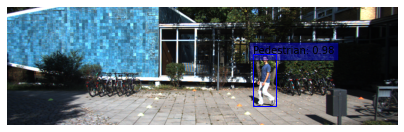

Stop Stop


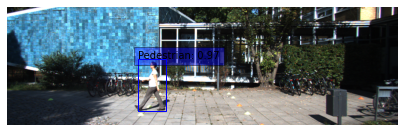

Stop Stop


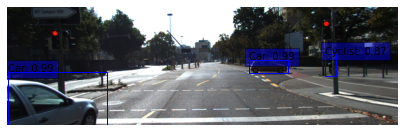

width: 122.400826 height: 43.132214
width: 309.00308 height: 166.21315
Stop Stop


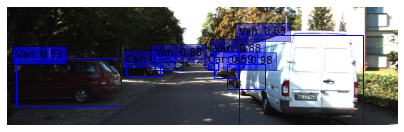

width: 109.47569 height: 42.512363
width: 120.90407 height: 79.29588
width: 90.08784 height: 44.425533
width: 74.79523 height: 83.14164
width: 391.5196 height: 292.259
Stop Stop


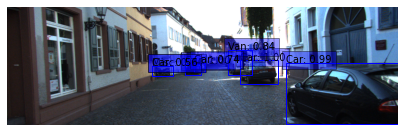

width: 121.91439 height: 76.29749
width: 51.08176 height: 33.230946
width: 361.00485 height: 192.90324
Stop Stop


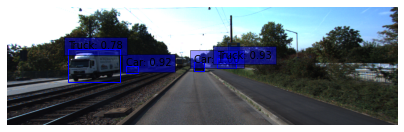

width: 33.18605 height: 29.417603
width: 60.89043 height: 30.872242
width: 40.43371 height: 22.626257
width: 163.82816 height: 106.904076
Go Go


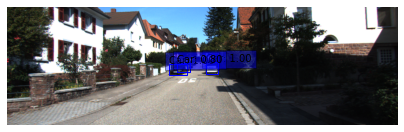

width: 37.303326 height: 38.78077
width: 57.034637 height: 34.437782
width: 41.054596 height: 28.419277
Go Go


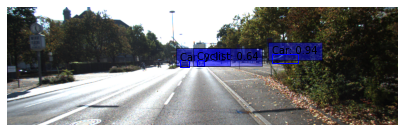

width: 80.88367 height: 30.803816
width: 28.580902 height: 20.407516
width: 24.639196 height: 20.737057
Go Go


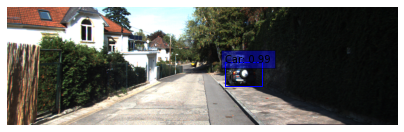

width: 116.20878 height: 74.228645
Go Go


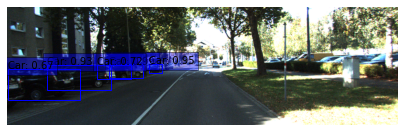

width: 108.52562 height: 42.041378
width: 41.052834 height: 29.464321
width: 205.75963 height: 78.05032
width: 108.645386 height: 44.407677
width: 228.59082 height: 96.55424
Go Go
100점입니다.


In [52]:
# 첫 번째 학습 후 결과!
import os

def test_system(func):
    work_dir = './data'
    score = 0
    test_set=[
        ("stop_1.png", "Stop"),
        ("stop_2.png", "Stop"),
        ("stop_3.png", "Stop"),
        ("stop_4.png", "Stop"),
        ("stop_5.png", "Stop"),
        ("go_1.png", "Go"),
        ("go_2.png", "Go"),
        ("go_3.png", "Go"),
        ("go_4.png", "Go"),
        ("go_5.png", "Go"),
    ]
    
    for image_file, answer in test_set:
        image_path = work_dir + '/' + image_file
        pred = func(image_path)
        print(pred, answer)
        if pred == answer:
            score += 10
        
    print(f"{score}점입니다.")

test_system(self_drive_assist)

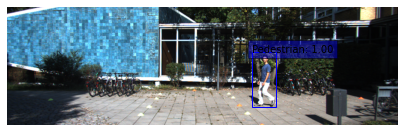

Stop Stop


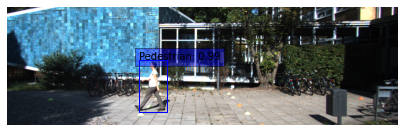

Stop Stop


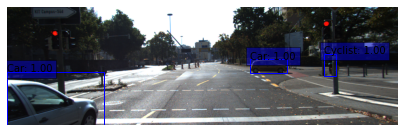

width: 304.69034 height: 165.87828
Stop Stop


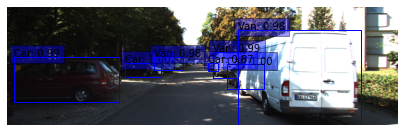

width: 118.42244 height: 79.00014
width: 115.57444 height: 44.760147
width: 79.62757 height: 84.454056
width: 333.7156 height: 144.91368
Stop Stop


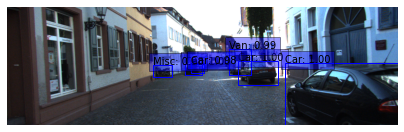

width: 52.000755 height: 33.971317
width: 126.395515 height: 77.40856
width: 358.22635 height: 197.51317
Stop Stop


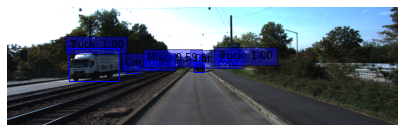

width: 32.66115 height: 31.493244
width: 62.07068 height: 31.311892
width: 161.67409 height: 105.67546
width: 43.151222 height: 24.748276
width: 27.568583 height: 27.360897
Go Go


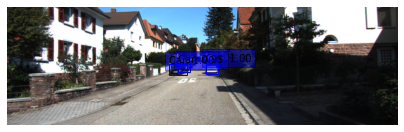

width: 39.455227 height: 41.39936
width: 56.003952 height: 36.357033
width: 36.86737 height: 28.353025
Go Go


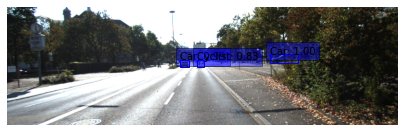

width: 86.750275 height: 27.939785
width: 28.198008 height: 22.1619
width: 22.253952 height: 21.924244
Go Go


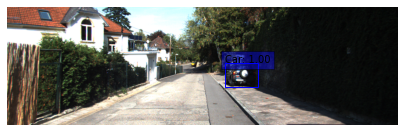

width: 104.71691 height: 77.25166
Go Go


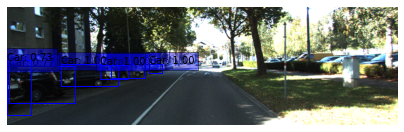

width: 181.95015 height: 69.09152
width: 107.76432 height: 42.86836
width: 43.005585 height: 31.07441
width: 88.13447 height: 43.638786
width: 208.61626 height: 117.81027
width: 75.57847 height: 174.0029
Go Go
100점입니다.


In [67]:
# 두 번의 추가 학습 후 결과!
import os

def test_system(func):
    work_dir = './data'
    score = 0
    test_set=[
        ("stop_1.png", "Stop"),
        ("stop_2.png", "Stop"),
        ("stop_3.png", "Stop"),
        ("stop_4.png", "Stop"),
        ("stop_5.png", "Stop"),
        ("go_1.png", "Go"),
        ("go_2.png", "Go"),
        ("go_3.png", "Go"),
        ("go_4.png", "Go"),
        ("go_5.png", "Go"),
    ]
    
    for image_file, answer in test_set:
        image_path = work_dir + '/' + image_file
        pred = func(image_path)
        print(pred, answer)
        if pred == answer:
            score += 10
        
    print(f"{score}점입니다.")

test_system(self_drive_assist)

평가문항	
1. KITTI 데이터셋에 대한 분석이 체계적으로 진행되었다.	
상세기준 : KITTI 데이터셋 구조와 내용을 파악하고 이를 토대로 필요한 데이터셋 가공을 정상 진행하였다.


2. RetinaNet 학습이 정상적으로 진행되어 object detection 결과의 시각화까지 진행되었다.	
상세기준 : 바운딩박스가 정확히 표시된 시각화된 이미지를 생성하였다.


3. 자율주행 Object Detection 테스트시스템 적용결과 만족스러운 정확도 성능을 달성하였다.	
상세기준 : 테스트 수행결과 90% 이상의 정확도를 보였다.

## 회고록
- 이번 프로젝트는 자율 주행 자동차을 이용하여 도로를 주행할 때, 차량과 사람을 인식하여, 주행을 계속 할 것인지, 멈출 것인지를 결정하는 프로젝트였습니다. 'Car', 'Van', 'Truck', 'Pedestrian', 'Person_sitting', 'Cyclist', 'Tram', 'Misc' 총 여덟개의 클래스로 이루어진 'kitti' 데이터 셋을 바탕으로 앵커박스를 만들고 이를 통해 물체에 바운딩 박스를 씌워줍니다. 그렇게 찾은 이미지 내 차량 바운딩 박스의 width 크기와 사람 클래스의 유무를 바탕으로 GO, STOP을 결정하는 프로젝트입니다.


- **느낀점** : 이미지 내에 데이터를 읽어 앵커박스를 만들고, object에 바운딩 박스를 그리는 단순한 방법이 자율 주행 자동차의 주행을 컨트롤 하는 원리가 될 수 있다는 부분이 인상 깊었습니다. 다만 이번 프로젝트에서는 복잡한 코드들이 다수 나와서 체감 난이도가 높았고, 1 에폭당 학습시간이 굉장히 길다는 점에서 누적 피로도가 심히 높았습니다. 학습 환경상 커널의 불안정성 때문에 불안한 마음에 한시도 곁을 떠날 수 없어 더욱 피로도가 증폭 되었던 것 같습니다. 이에 짧은 에폭으로 여러번에 걸쳐서 학습을 시도 했습니다.


- **배운점** : 앞으로도 이러한 데이터 셋이나 복잡한 코드들을 마주 할 일이 많아 질 수 있음을 인지하고, 남들보다 베이스가 부족한만큼 더디더라도 조금씩 코드 공부를 해야겠다고 생각했습니다. 또한, 앞으로도 학습 시간이 긴 데이터셋 과 모델을 사용할 수 있으니, 모델을 저장하는 콜백함수와 히스토리 저장 및 불러오기하는 부분을 모듈화 하면 좋겠다고 생각했습니다.


- **아쉬운 점** : 프로젝트 노드를 진행함에 있어 너무 많은 시간을 뺏기지 않도록 좀 더 빡 집중을 해야겠다고 생각했습니다. 너무 딴짓을 많이 한것 같습니다. 그리고 노드에 대해서는 코딩 기본기가 부족한 저와 같은 사람을 위해 정답 코드를 공개해주면 좋겠다고 생각했습니다. 정답 코드가 없으니 나의 코드가 맞는 코드인지 아닌지에 대한 확신이 없어서 점점 더 GPT와의 면담 시간이 길어지는데, GPT의 대답이 항상 옳은 방향으로만 작동하지는 않기에 정답 코드가 존재하면 좋겠습니다. 또한 부족한 코딩 실력으로 인해 노드에서 제공해주는 코드에 대한 이해도 부족으로 다양한 시도를 할 수 없었던 부분이 많이 아쉽습니다.